# Video: Variance Explained by Each Principal Component

This video shows how much variance is explained by each principal component for various data sets, and links these variance curves to the speed that approximation error drops using more principal components.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])

In [ ]:
penguins_pca_columns = [c for c in penguins.columns if penguins[c].dtype == 'float64']
penguins_pca_columns

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

In [ ]:
penguins_pca = PCA()
penguins_pca.fit(penguins[penguins_pca_columns].dropna())
penguins_components = pd.DataFrame(penguins_pca.components_, columns=penguins_pca_columns)
penguins_components

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.004014,-0.001149,0.015170,0.999876,-0.000369,-0.000368
1,-0.308003,0.093243,-0.946673,0.015707,0.001370,0.001227
2,0.936946,0.146198,-0.290194,0.000872,0.054578,0.116471
3,-0.123505,0.974537,0.136403,-0.000390,0.115170,0.056156
4,-0.108833,-0.099775,0.027162,0.000347,0.226099,0.962467
5,0.012303,0.101256,0.004877,-0.000275,-0.965730,0.238616


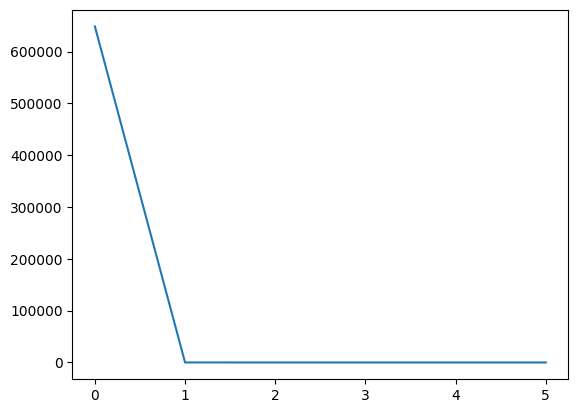

In [ ]:
plt.plot(penguins_pca.explained_variance_)
None

In [ ]:
penguins_pca.explained_variance_

array([6.48425564e+05, 4.94342160e+01, 1.65052040e+01, 2.39145821e+00,
       3.18313761e-01, 1.27717586e-01])

In [ ]:
penguins[penguins_pca_columns].head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,,,,,,
1,39.1,18.7,181.0,3750.0,NaN,NaN
2,39.5,17.4,186.0,3800.0,8.94956,-24.69454
3,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,NaN,NaN,NaN,NaN,NaN,NaN
5,36.7,19.3,193.0,3450.0,8.76651,-25.32426


In [ ]:
penguins_components

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.004014,-0.001149,0.015170,0.999876,-0.000369,-0.000368
1,-0.308003,0.093243,-0.946673,0.015707,0.001370,0.001227
2,0.936946,0.146198,-0.290194,0.000872,0.054578,0.116471
3,-0.123505,0.974537,0.136403,-0.000390,0.115170,0.056156
4,-0.108833,-0.099775,0.027162,0.000347,0.226099,0.962467
5,0.012303,0.101256,0.004877,-0.000275,-0.965730,0.238616


In [ ]:
(penguins[penguins_pca_columns] @ penguins_components.T).var(axis=0)

0    648425.564153
1        49.434216
2        16.505204
3         2.391458
4         0.318314
5         0.127718
dtype: float64

In [ ]:
penguins_pca.explained_variance_

array([6.48425564e+05, 4.94342160e+01, 1.65052040e+01, 2.39145821e+00,
       3.18313761e-01, 1.27717586e-01])

In [ ]:
penguins[penguins_pca_columns].dropna().var(numeric_only=True)

Culmen Length (mm)         29.668458
Culmen Depth (mm)           3.914985
Flipper Length (mm)       194.950916
Body Mass (g)          648264.880952
Delta 15 N (o/oo)           0.304451
Delta 13 C (o/oo)           0.621301
dtype: float64

In [ ]:
np.flip(np.cumsum(np.flip(penguins_pca.explained_variance_)))

array([6.48494341e+05, 6.87769095e+01, 1.93426935e+01, 2.83748956e+00,
       4.46031347e-01, 1.27717586e-01])

In [2]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv", sep="\t")


In [ ]:
abalone_pca_columns = [c for c in abalone.columns if abalone[c].dtype == 'float64' or abalone[c].dtype == 'int64']
abalone_pca_columns

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

In [ ]:
abalone.var(numeric_only=True)

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole_weight       0.240481
Shucked_weight     0.049268
Viscera_weight     0.012015
Shell_weight       0.019377
Rings             10.395266
dtype: float64

In [ ]:
abalone_pca = PCA()
abalone_pca.fit(abalone[abalone_pca_columns])
abalone_components = pd.DataFrame(abalone_pca.components_, columns=abalone_pca_columns)
abalone_components

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.021051,0.017940,0.007316,0.083680,0.029735,0.017460,0.027431,0.995107
1,0.183053,0.148804,0.052460,0.834461,0.399952,0.183253,0.205272,-0.097937
2,-0.742040,-0.596175,-0.140358,0.228848,0.136355,-0.007745,-0.056503,0.005853
3,-0.090689,-0.042085,0.037117,0.220616,-0.754544,0.073324,0.604242,-0.011544
4,-0.030701,0.023341,0.001458,-0.125571,0.331709,-0.756052,0.548722,-0.000995
5,-0.152311,-0.074973,0.910437,-0.182698,0.168819,0.230202,0.165567,-0.000404
6,0.005435,0.029361,0.381366,0.382722,-0.335655,-0.578985,-0.509218,-0.001407
7,-0.618894,0.783142,-0.042172,-0.002500,0.005437,0.029104,-0.031587,-0.000308


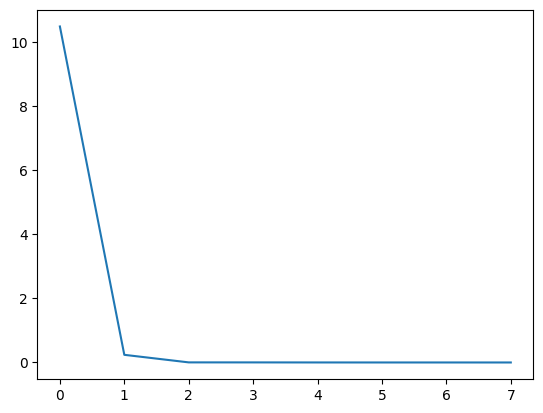

In [ ]:
plt.plot(abalone_pca.explained_variance_)
None

In [ ]:
abalone_pca.explained_variance_

array([1.04954314e+01, 2.39268823e-01, 3.02087647e-03, 2.60218996e-03,
       1.05068657e-03, 4.88782005e-04, 4.17493194e-04, 1.47688518e-04])